In [1]:
# Importing requird python packages
# Path to hsmpy package
HSMPY_PATH = r'\\CHCFPP01\Guest\MRajabi\Python Scripts'
import sys, os, arcpy, csv, json, math
sys.path.append(HSMPY_PATH)
import hsmpy3
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime
from IPython.display import Image
from IPython.core.display import HTML 
import subprocess 
import webbrowser
import time
import copy
import scipy
from matplotlib.gridspec import GridSpec
import matplotlib
from __future__ import print_function
from mailmerge import MailMerge
import shutil
import openpyxl
from scipy.optimize import curve_fit
from time import gmtime, strftime
from ipywidgets import FloatProgress
from ipywidgets import IntProgress
print(strftime("%Y-%m-%d %H:%M:%S"))

2018-11-06 13:25:18


In [2]:
# Defining Parameteres
print(strftime("%Y-%m-%d %H:%M:%S"))
Years = range(2012,2017)
MaxOpenProcesses = 15
Project_DIR  = r'\\CHCFPP01\Proj\ILDOT\650511SAFETYPROGRAM\4_WorkData\WO00_OtherStates\NewMexico\3_WorkData\7_NetworkScreening'
ReceivedDir  = Project_DIR + '\\2.Received_Data'
Project_GDB  = Project_DIR + '\\5.NM_NS_GDB.gdb'
PythonDir   = Project_DIR + '\\6.Python_Notebook'

Src_Loc  = ReceivedDir + '\\crash_asof_11jun2018.csv'
Src_Unit = ReceivedDir + '\\vehicle_asof_11jun2018.csv'
Src_Occ  = ReceivedDir + '\\occupant_asof_11jun2018.csv'

Src_Ped_Loc  = ReceivedDir + '\\Ped_2017_KAB\\crashkabped.csv'
Src_Ped_Unit = ReceivedDir + '\\Ped_2017_KAB\\vehiclekabped.csv'
Src_Ped_Occ  = ReceivedDir + '\\Ped_2017_KAB\\occkabped.csv'

HPMS105 = {year:ReceivedDir + '\\v105\\jg_request.gdb\\HPMS{}Data'.format(year) for year in Years}
HPMS10  = {year:ReceivedDir + '\\v10\\jg_request.gdb\\HPMS{}Data'.format(year) for year in Years}

FOU_2017_105 = ReceivedDir + '\\v105\\jg_request.gdb\\HPMS2017Ownership_Urban_FuncSys'
FOU_2017_10  = ReceivedDir + '\\v10\\jg_request.gdb\\HPMS2017Ownership_Urban_FuncSys'

FHWA_HPMS     = {year:ReceivedDir + '\\FHWA_HPMS\\newmexico{}\\NewMexico{}.shp'.format(year,year) for year in Years}
MS2_HPMS_2017 = {year:ReceivedDir + '\\NM_HPMS_N2017_A{}.csv'.format(year) for year in Years}

Routes  = {year:Project_GDB + '\\Routes_{}'.format(year) for year in Years}
AttTabs = {year:Project_GDB + '\\SegAtt_{}'.format(year) for year in Years}
Segs    = {year:Project_GDB + '\\Seg_{}'.format(year) for year in Years}
CrashData = {year:Project_GDB + '\\Crash_{}'.format(year) for year in range(2012,2018)}

UTM13N   = arcpy.SpatialReference(26913)
NAD83_NM = arcpy.SpatialReference(6529)

RouteID = "ROUTE_ID"
BEG_STA = 'BEG_POINT'
END_STA = 'END_POINT'
Fields = ['F_SYSTEM','THROUGH_LANES','FACILITY_TYPE','AADT','MEDIAN_TYPE','SPEED_LIMIT','LANE_WIDTH']

2018-11-06 13:25:18


In [84]:
Loc_DF = pd.read_csv(Src_Loc,low_memory=False)
Loc_DF.index = ['{}_{}'.format(y,u) for y,u in zip(Loc_DF.year,Loc_DF.UCRnumber)]
Loc_DF.index.name = 'CID'
Loc_DF = Loc_DF.sort_index()
Loc_DF['Date' ] = [hsmpy3.nm.FindDate (r.CrashDate,r.MilitaryTime) for i,r in Loc_DF.iterrows()]
Loc_DF['KABCO'] = [hsmpy3.nm.FindKABCO(r.Killed,r.ClassA,r.ClassB,r.ClassC) for i,r in Loc_DF.iterrows()]
F2K = ['Agency', 'County', 'City', 'UrbnRurl', 'System', 'GIS_Route', 'GIS_Milepost',
 'CrashDirection', 'Astreet', 'Bstreet', 'Landmark', 'DirectionFromLandmark', 'Measurement', 
 'MeasurementUnit', 'GIS_NATAMER_USCENSUS', 'GIS_TRANSDIST', 'GIS_MAINTDIST', 'GIS_SPDIST', 
 'GIS_UTMX', 'GIS_UTMY', 'GIS_LAT', 'GIS_LONG', 
 'Fatal_Injury', 'Severity', 'Class', 'Analysis', 'CrashOccurrence', 'HitRun', 
 'Light', 'PropertyDamage', 'Weather', 'RoadCharacter', 'RoadGrade', 'StationReport', 
 'TribalJurisdiction', 'Killed', 'ClassA', 'ClassB', 'ClassC', 'Injured', 'Unhurt', 'Total', 
 'nVeh', 'MotorVeh', 'Motorists', 'NonMotorists', 'TopCFacc', 'Alcinv', 'Druginv', 'PEDinv', 
 'MaxDam', 'NonLocal', 'SHDTPROP', 'pType', 'pDesc', 
 'pState', 'WitnessPresent', 'TimeNotified', 'TimeArrived', 'ReportDate', 
 'Date', 'KABCO']
#Loc_DF = Loc_DF[F2K]
#Loc_DF.to_csv('Crash_Cleaned.csv')

In [87]:
Loc_DF = pd.read_csv(Src_Loc,low_memory=False)
Loc_DF.index = ['{}_{}'.format(y,u) for y,u in zip(Loc_DF.year,Loc_DF.UCRnumber)]
Loc_DF[Loc_DF.TRKinv==1].index

Index(['2012_10395507', '2012_10397550', '2012_10397717', '2012_10398570',
       '2012_12612400', '2012_201207261', '2012_201207462', '2012_201224676',
       '2012_201227868', '2012_22041400',
       ...
       '2016_710379160', '2016_710380057', '2016_710380082', '2016_710380257',
       '2016_710380482', '2016_801604176', '2016_801605740', '2016_801611026',
       '2016_801611083', '2016_801627706'],
      dtype='object', name='CID', length=1395)

In [82]:
Unit_DF = pd.read_csv(Src_Unit,low_memory=False)
Unit_DF['CUID'] = ['{}_{}_{}'.format(y,u,v) for y,u,v in zip(Unit_DF.year, Unit_DF.UCRnumber,Unit_DF.VehNo)]
Unit_DF['CID'] = ['{}_{}'.format(y,u) for y,u in zip(Unit_DF.year, Unit_DF.UCRnumber)]
Unit_DF.index = pd.MultiIndex.from_tuples([('{}_{}'.format(y,u),v) for y,u,v in zip(Unit_DF.year, Unit_DF.UCRnumber,Unit_DF.VehNo)],names=['CID','Unit'])
Unit_DF = Unit_DF.sort_index()
F2K = ['TopCFacc', 'DALC', 'DRUG', 'DRESID', 'TopCFcar', 'TypeV', 'Belt', 'Helmet', 'VehDirection', 
 'StreetOn', 'PostedSpeed', 'SafeSpeed', 'LeftScene', 'DrSeatPos', 'DrAge', 'DrSex', 'DrInjuryCode', 'DrOPCode', 
 'DrOPProperlyUsed', 'DrAirbagDeployed', 'DrEjected', 'DrEMSNum', 'DrMedTrans', 'DLState', 'DLType', 'DLRestrictions', 
 'DLExpires', 'DLEndorsements', 'DLStatus', 'VeYear', 'VeMake', 'VeColor', 'VeBodystyle', 'VeCargoBody', 
 'VeUse1', 'VeUse2', 'VeLicPlateRegYr', 'VeLicPlateState', 
 'VeTowed', 'VeTowedDisabled', 'VeDamageSeverity', 'VeDamageExtent', 'VeDamage1', 'VeDamage2', 'VeDamage3', 'VeDamage4', 'VeDamage5', 'VeDamage6', 'VeDamage7', 'VeDamage8', 'VeDamage9', 'VeDamage10', 'VeDamage11', 'VeDamage12', 'VeDamageAll', 'VeDamageNone', 'VeDamageTop', 'VeDamageUndercarriage', 
 'USDOTNum', 'ICCCarrierCode', 'InterstateCarrier', 'NumberofAxles', 'GrossVehicleWeight', 
 'HazmatName', 'HazmatPlacard', 'HazmatID', 'HazmatNum', 'HazmatReleased', 
 'LiabilityInsurance', 'InterLock', 'Trailer1LicYear', 'Trailer1Make', 'Trailer1Type', 'Trailer1Year', 'Trailer2LicYear', 'Trailer2Make', 'Trailer2Type', 'Trailer2Year', 'Trailer3LicYear', 'Trailer3Make', 'Trailer3Type', 'Trailer3Year', 
 'RoadConditionsVe', 'RoadSurfaceVe', 'TrafficControlDevice', 'RoadDesignLanes', 'RoadDesignDivider', 'RoadDesign', 
 'ACFAvoidNoContactOther', 'ACFAvoidNoContactVe', 'ACFCellPhone', 'ACFDefectiveSteering', 'ACFDefectiveTires', 'ACFDisregardedTrafficSignal', 
 'ACFDriverInattention', 'ACFDriverlessMovingVe', 'ACFDroveLeftOfCenter', 'ACFExcessiveSpeed', 'ACFFailedToYieldEmgcyVe', 
 'ACFFailedToYieldPoliceVe', 'ACFFailedToYieldRightOfWay', 'ACFFollowingTooClosely', 'ACFHighSpeedPursuit', 
 'ACFImproperBacking', 'ACFImproperLaneChange', 'ACFImproperOvertaking', 
 'ACFInadequateBrakes', 'ACFLowVisibilityDueToSmoke', 'ACFMadeImproperTurn', 'ACFNone', 
 'ACFOtherImproperDriving', 'ACFOtherMechanicalDefect', 'ACFOtherNoDriverError', 'ACFPassedStopSign', 
 'ACFPedestrianError', 'ACFRoadDefect', 'ACFSpeed2FastForConditions', 'ACFTexting', 
 'ACFTrafficControlInopMissing', 'ACFUnderInflOfDrugs', 'ACFUnderInfluenceOfAlcohol', 
 'ACFVeSkiddedBeforeBrk', 
 'DAGoingStraight', 'DAOvertakingPassing', 'DARightTurn', 'DALeftTurn', 'DAUturn', 
 'DASlowing', 'DABacking', 'DAStoppedForTraffic', 'DAStoppedForSignsSignal', 
 'DAStartInTrafficLane', 'DAStartFromPark', 'DAParked', 
 'DAOther', 'DAUnknown', 
 'SequenceEvent1', 'SequenceEvent2', 'SequenceEvent3', 'SequenceEvent4', 
 'SobrietyConsumeAlcohol', 'SobrietyConsumeCtrlSubtance', 'SobrietyNotConsumeAlcohol', 
 'SobrietyUnknown', 'SobrietyConsumeMeds', 'SobrietyTestByInst', 'SobrietyBreathTest', 
 'SobrietyBAC', 'SobrietyBloodTest', 'SobrietyFieldSobrietyTest', 
 'SobrietyTestRefused', 
 'ConditionFatiguedAsleep', 'ConditionEyesightImpaired', 'ConditionHearingImpaired', 
 'ConditionIllness', 'ConditionMedsDrugsAlcohol', 'ConditionAmputee', 'ConditionNoAppDefects', 
 'ConditionOther', 'ConditionOtherText', 'ConditionUnknown', 'PedAtIntWithSignal', 'PedAtIntAgainstSignal', 
 'PedAtIntNoSignal', 'PedAtIntDiagonal', 'PedNotIntFromBehindObstruct', 
 'PedNotIntNoCrosswalk', 'PedNotIntCrosswalk', 'PedNotIntWalkWithTraffic', 'PedNotIntOther', 
 'PedNotIntOtherText', 'PedNotIntWalkAgainstTraffic', 'PedNotIntStanding', 'PedNotIntPushWorkOnVe', 
 'PedNotIntPlayinginRoad', 'vVehNo', 'vViolation', 'vAction', 'TraCS']
Unit_DF =  Unit_DF[F2K]
Unit_DF.to_csv('Vehicle_Cleaned.csv')

In [80]:
OL = ['CUID','PPLNo', 'OccNo', 'SeatPos', 'Age', 'Sex', 'Injury', 'OPCode', 'OPProperlyUsed', 'AirbagDeployed', 'Ejected', 'MedTrans', 'DAparked', 'Belt', 'Helmet']
Occ_DF = pd.read_csv(Src_Occ,low_memory=False)
Occ_DF['CUID'] = ['{}_{}_{}'.format(y,u,v) for y,u,v,p in zip(Occ_DF.year, Occ_DF.UCRnumber,Occ_DF.VehNo,Occ_DF.PPLNo)]
#Occ_DF[OL].to_csv(ReceivedDir + '\\Occ_Input.csv',index = False)
#arcpy.Delete_management(Project_GDB + '\\Occ_Input')
#arcpy.TableToTable_conversion(in_rows=ReceivedDir + '\\Occ_Input.csv',out_path=Project_GDB,out_name='Occ_Input')
Occ_DF.index = pd.MultiIndex.from_tuples([('{}_{}'.format(y,u),v,p) for y,u,v,p in zip(Occ_DF.year, Occ_DF.UCRnumber,Occ_DF.VehNo,Occ_DF.PPLNo)],names=['CID','Unit','Person'])
F2K = ['SeatPos', 'Age', 'Sex', 'Injury', 'OPCode', 'OPProperlyUsed', 'AirbagDeployed', 'Ejected', 'MedTrans',
 'DAparked', 'Belt', 'Helmet', 'AlcInCar', 'DrugInCar', 'Class', 'Analysis', 'Severity']
Occ_DF = Occ_DF.sort_index()
Occ_DF = Occ_DF[F2K]
Occ_DF.to_csv('Person_Cleaned.csv')

Highest risk—5 percent of highway system length, shown in black.
• Medium-high risk—10 percent of highway system length, shown in red.
• Medium risk—20 percent of highway system length, shown in yellow.
• Medium-low risk—25 percent of highway system length, shown in light green.
• Lowest risk—40 percent of highway system length, shown in dark green.

In [3]:
# Read Crash Data
print(strftime("%Y-%m-%d %H:%M:%S"))
Crash_DF = pd.concat([hsmpy3.common.FCtoDF(CrashData[year],readGeometry=True) for year in range(2012,2018)])
Crash_DF['Year'] = [d.year for d in Crash_DF.Date]
Crash_DF['PedCrashCount'] = [{True:1,False:0}[sum([k,a,b])>0] for k,a,b in zip(Crash_DF.PedK,Crash_DF.PedA,Crash_DF.PedB)]
Crash_DF['Count'] = 1
Crash_DF['KAB'] = Crash_DF.Killed + Crash_DF.ClassA + Crash_DF.ClassB
Crash_DF.index = ['{}_{}'.format(y,u) for u,y in zip(Crash_DF.UCRnum,Crash_DF.Year)]
Crash_DF.index.name = 'CID'
Crash_DF = Crash_DF.drop('CID',axis=1)
display(pd.DataFrame(Crash_DF.groupby(['Year'])['Count','Killed','ClassA','ClassB','PedCrashCount','PedK','PedA','PedB'].aggregate(np.sum)))
print(strftime("%Y-%m-%d %H:%M:%S"))

2018-11-06 13:25:18


,Count,Killed,ClassA,ClassB,PedCrashCount,PedK,PedA,PedB
Year,,,,,,,,
2012,4143,362,1592,3456,242,61,58,129
2013,4069,311,1290,3534,281,53,95,141
2014,4398,384,1241,3840,350,74,94,189
2015,4903,298,1325,4511,378,55,126,211
2016,5048,405,1153,4750,353,77,84,204
2017,342,74,83,197,342,74,82,191


2018-11-06 13:27:17


In [41]:
Crash_DF['X'] = [s.firstPoint.X for s in Crash_DF.Shape]
Crash_DF['Y'] = [s.firstPoint.Y for s in Crash_DF.Shape]
idx = Crash_DF[(~pd.isnull(Crash_DF.X)) & (~pd.isnull(Crash_DF.Y))].index
Crash_DF.loc[idx,'Point'] = [arcpy.PointGeometry(arcpy.Point(x,y),hsmpy3.nm.NAD83_NM).projectAs(hsmpy3.common.WGS1984) for x,y in zip(list(Crash_DF.loc[idx,'X']),list(Crash_DF.loc[idx,'Y']))]
def GetLON(p):
        try:
            return(p.X)
        except:
            pass
def GetLAT(p):
        try:
            return(p.Y)
        except:
            pass
Crash_DF.loc[idx,'LAT'] = [GetLAT(p) for p in Crash_DF.Point.loc[idx]]
Crash_DF.loc[idx,'LON'] = [GetLON(p) for p in Crash_DF.Point.loc[idx]]
    
Crash_DF['SUN_ANG'] = [hsmpy3.il.SunAngle(lt,ln,dt) for lt,ln,dt in zip(list(Crash_DF.LAT),list(Crash_DF.LON),list(Crash_DF.Date))]


In [52]:
def DayNight(d,s):
    if s<-6:
        return('Night')
    if s>0:
        return('Day')
    if s>=-6 and s <=0:
        if d.hour<12:
            return('Dawn')
        else:
            return('Dusk')
    return('Unknown')
Crash_DF["DayNight"] = [DayNight(d,s) for d,s in zip(Crash_DF.Date,Crash_DF.SUN_ANG)]

In [56]:
Crash_DF.DayNight.value_counts()

Day        16036
Night       5639
Dusk         670
Dawn         545
Unknown       13
Name: DayNight, dtype: int64

In [4]:
Ped_DF = Crash_DF[Crash_DF.PedCrashCount==1]

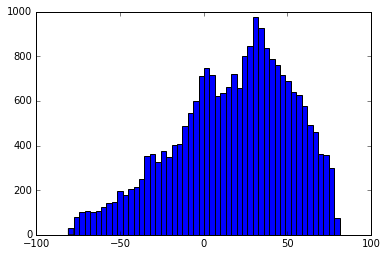

In [46]:
plt.hist(Crash_DF.SUN_ANG[~pd.isnull(Crash_DF.SUN_ANG)],bins=50)
plt.show()

In [65]:
import numpy as np
def LightConv(l):
    if pd.isnull(l):
        return('Unknown')
    else:
        return({1:'DayLight',2:'Dawn',3:'Dusk',4:'Dark - Lighted',5:'Dark - unlighted',6:'Unknown',0:'Unknown',99:'Unknown',98:'Unknown'}[l])
def WeatherConv(l):
    if pd.isnull(l):
        return('Unknown')
    else:
        return({1:'Clear',2:'Raining',3:'Snowing',4:'Fog',5:'Dust',6:'Wind',7:'Other',8:'Sleet or Hail',99:'Unknown',98:'Unknown',0:'Unknown'}[l])
    
Crash_DF['Light'] = [LightConv(l) for l in Loc_DF.Light.loc[Crash_DF.index]]
Crash_DF['Weather'] = [WeatherConv(l) for l in Loc_DF.Weather.loc[Crash_DF.index]]

print(Crash_DF.Light.value_counts())
print(Crash_DF.Weather.value_counts())

DayLight            14903
Dark - unlighted     3201
Dark - Lighted       3002
Unknown               862
Dusk                  591
Dawn                  344
Name: Light, dtype: int64
Clear            20370
Unknown            963
Raining            802
Snowing            333
Wind               188
Other               96
Sleet or Hail       68
Fog                 63
Dust                20
Name: Weather, dtype: int64


In [8]:
Crash_DF['Time'] = [datetime.time(datetime(2000,1,1,d.hour,0)).strftime('%I:%M %p') for d in Crash_DF.Date]
TimeOrder = [datetime.time(datetime(2000,1,1,d,0)).strftime('%I:%M %p') for d in range(0,24)]
Crash_DF['DayName'] = [d.weekday_name for d in Crash_DF.Date]
DayOrder = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
Crash_DF['Month']  = [d.strftime('%b') for d in Crash_DF.Date]
MonthOrder = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']


In [10]:
def SHSP_EABarStateLine(Crash_DF,Field,png_out,Order=[],Length=0):
    df = pd.DataFrame(Crash_DF.groupby([Field])['KAB'].aggregate(sum))
    df.KAB = df.KAB/float(sum(df.KAB))
    df.columns = [Field]
    if len(Order) == 0:
        df = df.sort_index(ascending=True)
    else:
        df = df.loc[Order]
    if 1<2:
        plt.figure(figsize=(13, 7), dpi=300, facecolor='w', edgecolor='k')
        eadf = pd.DataFrame(Crash_DF[Crash_DF.PedCrashCount==1].groupby([Field])['KAB'].aggregate(sum))
        eadf = eadf.fillna(0)
        eadf.KAB = eadf.KAB/float(sum(eadf.KAB))
        eadf.columns = [Field]
        if Length>0:
            eadf = eadf.sort_values(Field,ascending=False)
            eadf = eadf.iloc[range(min(Length,len(eadf)))]
            df = pd.DataFrame(Crash_DF.groupby([Field])['KAB'].aggregate(sum))
            df.KAB = df.KAB/float(sum(df.KAB))
            df.columns = [Field]
            if len(Order) == 0:
                df = df.sort_index(ascending=True)
            else:
                df = df.loc[Order]
            df  = df.loc[list(eadf.index)]
        else:
            eadf = eadf.loc[df.index]
        V = [v1-v2 for v1,v2 in zip(eadf[Field],df[Field])]
        my_cmap = matplotlib.cm.get_cmap('RdYlGn_r')
        my_norm = matplotlib.colors.Normalize(vmin=min(V), vmax=max(V))
        p1 = plt.bar(range(len(eadf)),eadf[Field],align='center',color=my_cmap(my_norm(V)))
        plt.xticks(range(len(df)),df.index,rotation=90)
        p2, = plt.plot(range(len(df)),df[Field],'-o',color='green')
        plt.xlabel(Field)
        #plt.xticks(rotation=90)
        plt.title('Pedestrian')
        plt.grid()
        plt.gca().set_yticklabels(['{:,.2%}'.format(x) for x in plt.gca().get_yticks()])
        plt.legend([p2,p1],['Statewide','Pedestrian'],loc=2,fancybox=True,framealpha=0.5,prop={'size': 9})
        plt.tight_layout()
        plt.savefig(png_out,transparent=True,dpi=1200)
        plt.show()
SHSP_EABarStateLine(Crash_DF,'Time','Time.png',Order=TimeOrder,Length=0)
SHSP_EABarStateLine(Crash_DF,'DayName','DayName.png',Order=DayOrder,Length=0)
SHSP_EABarStateLine(Crash_DF,'Month','Month.png',Order=MonthOrder,Length=0)
#SHSP_EABarStateLine(Crash_DF,'DayNight','DayNight.png',Order=['Dawn','Day','Dusk','Night'],Length=0)
SHSP_EABarStateLine(Crash_DF,'Light','Light.png',Order=[],Length=0)
SHSP_EABarStateLine(Crash_DF,'Weather','Weather.png',Order=[],Length=0)


KeyError: 'Light'

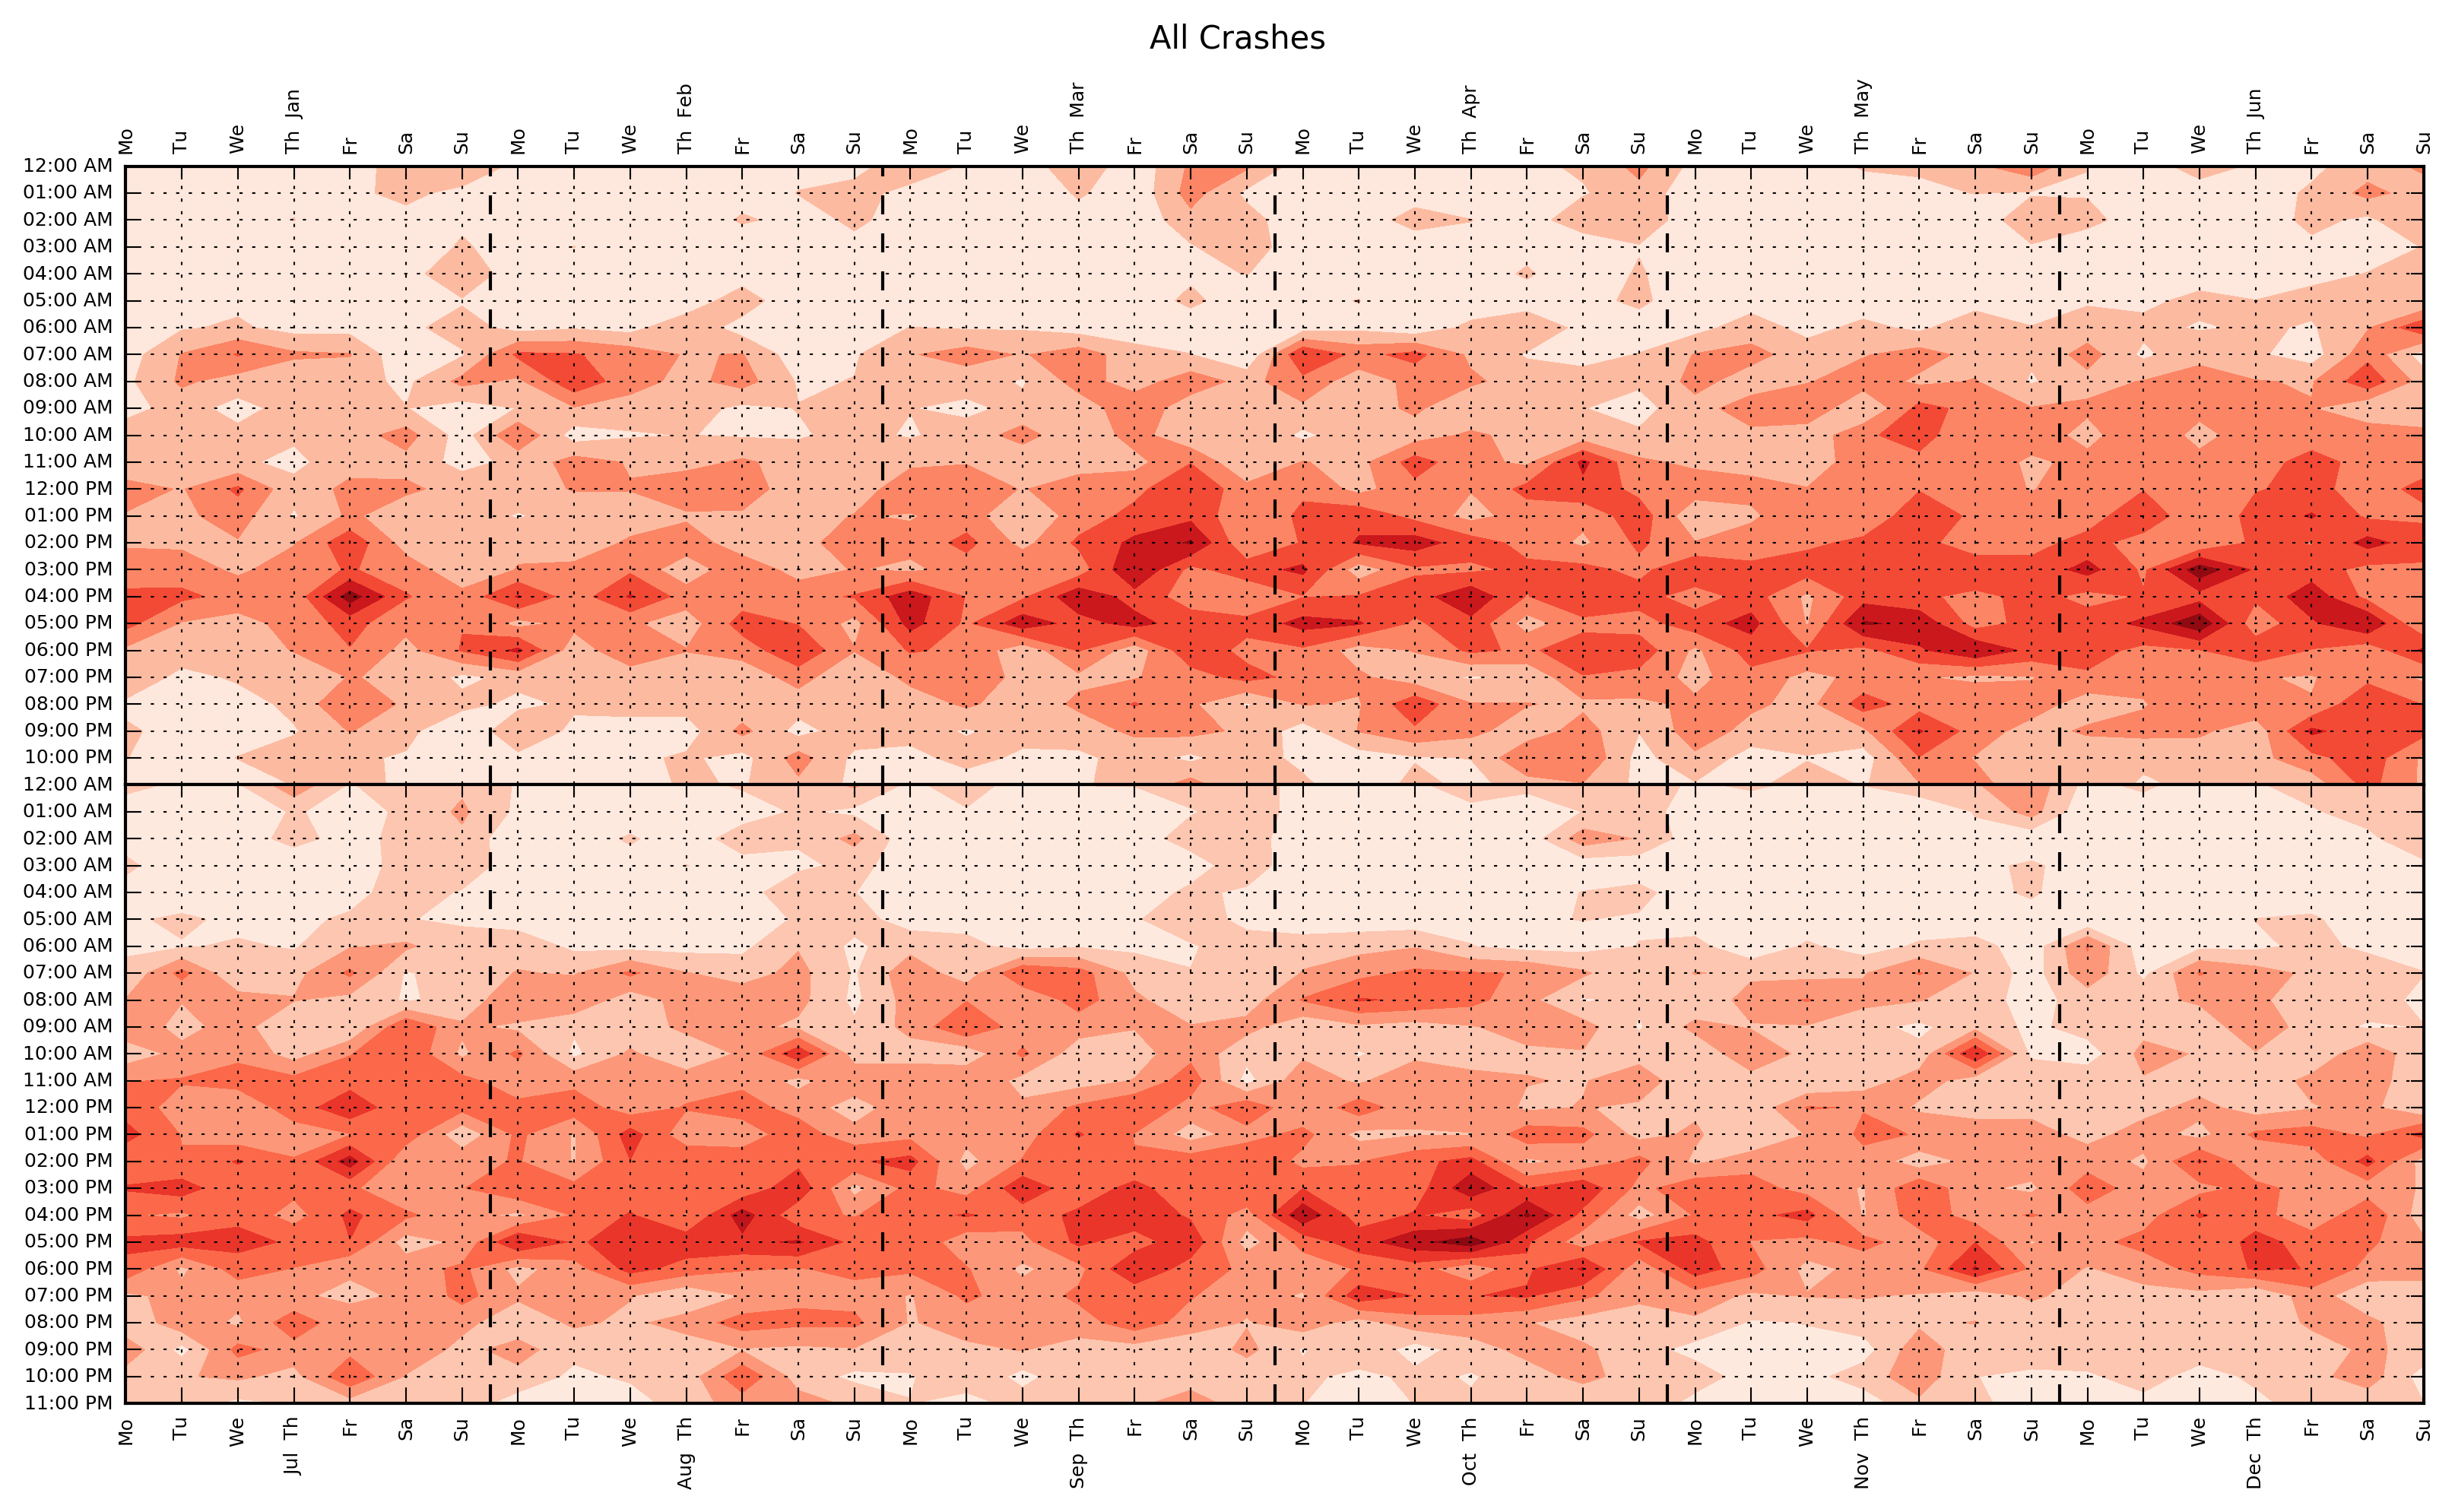

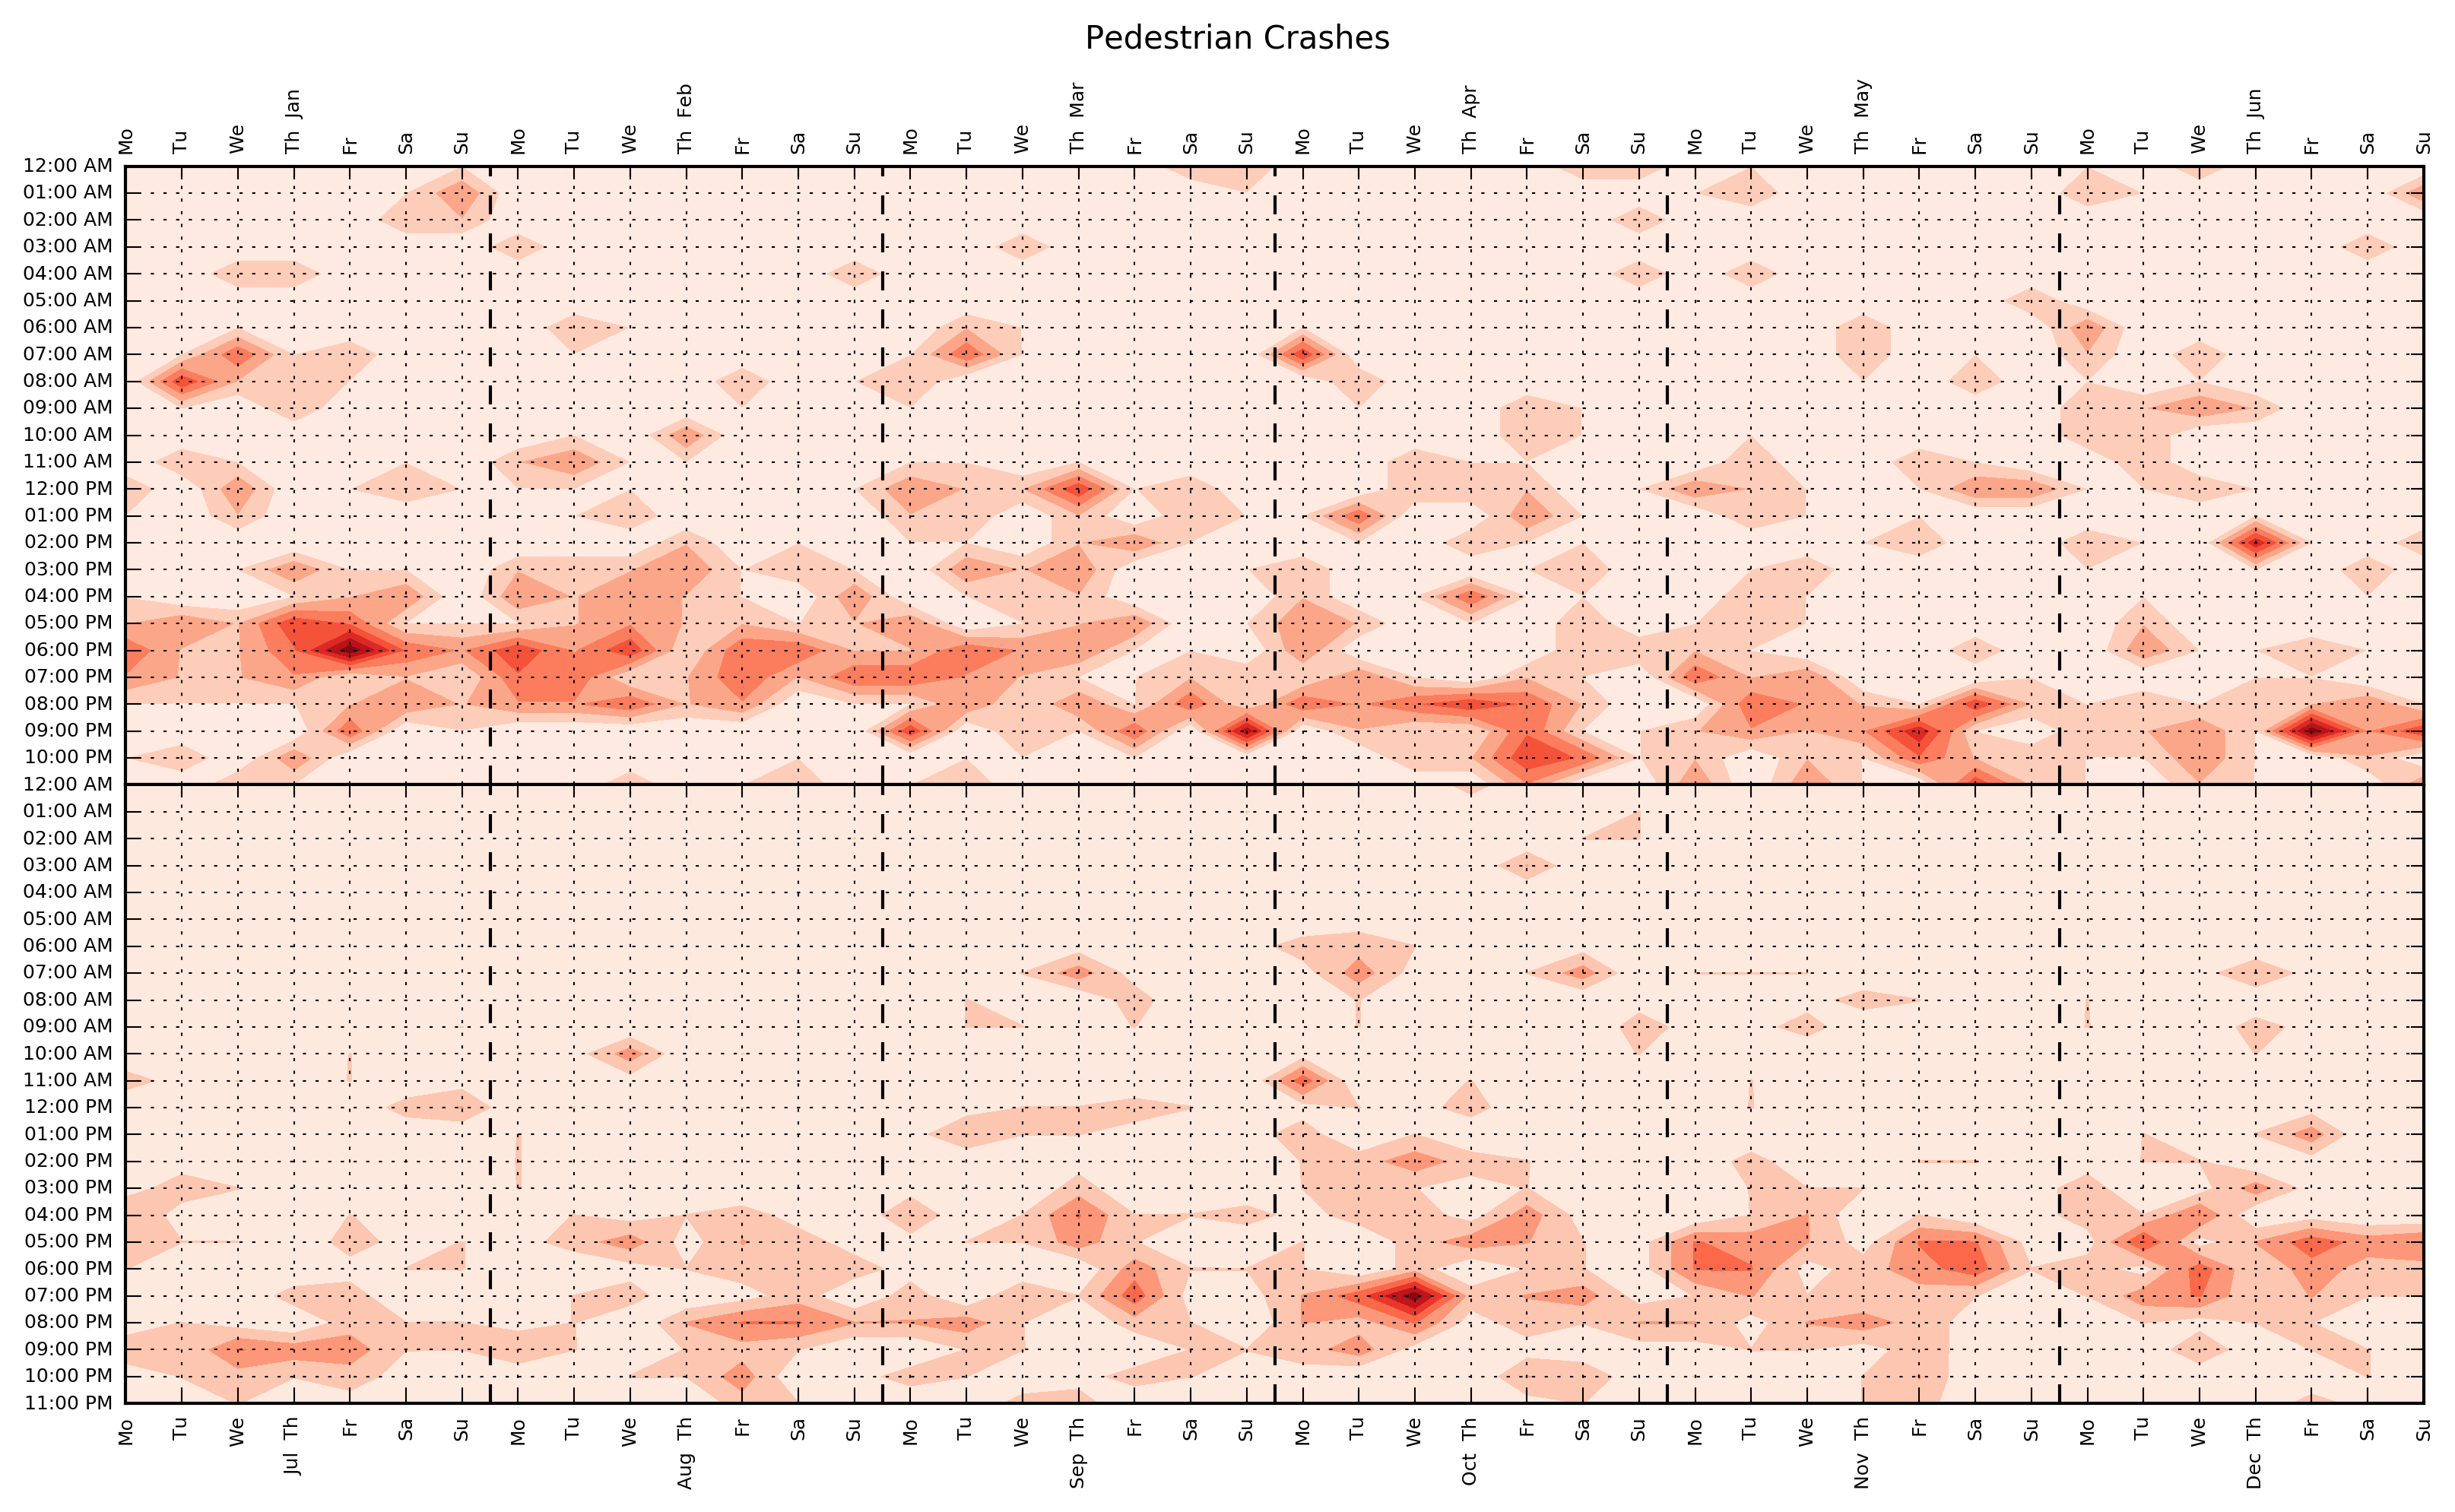

In [6]:
def SHSP_TimeTrend_Contour(DF,PNGName,Title):
    import warnings
    warnings.filterwarnings('ignore')
    DF['Time'] = [datetime.time(datetime(2000,1,1,d.hour,0)).strftime('%I:%M %p') for d in DF.Date]
    TimeOrder = [datetime.time(datetime(2000,1,1,d,0)).strftime('%I:%M %p') for d in range(0,24)]
    TimeOrder.reverse()
    DF['DayName'] = [d.weekday_name for d in DF.Date]
    DayOrder = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
    DF['Month']  = [d.strftime('%b') for d in DF.Date]
    MonthOrder = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    if 1<2:
        df0 = pd.DataFrame(DF.groupby(['Month','DayName','Time'])['KAB'].aggregate(sum))
        df0 = df0.unstack('Time').T
        df0.index = df0.index.droplevel(0)
        arr = []
        for m in MonthOrder:
            for d in DayOrder:
                arr.append((m,d))
        cs = pd.MultiIndex.from_tuples(arr)
        df = pd.DataFrame(columns=cs,index=TimeOrder)
        for i1 in df.index:
            for j1 in df.columns:
                try:
                    df.set_value(i1,j1,int(df0.loc[i1,j1]))
                except:
                    pass
        df = df.fillna(0)
        df = df.loc[TimeOrder]
        L = []
        for l in list(df.values):
            L.extend(l)
        v_max = max(L)
        v_min = min(L)
        df = df/v_max
        v_max = 1
        v_min = 0
    
        plt.figure(figsize=(13, 7), dpi=300, facecolor='w', edgecolor='k')
        ax1 = plt.subplot(211)
    
        df1 = df[MonthOrder[0:6]]
        pl1 = plt.contourf(df1, cmap=plt.cm.Reds,corner_mask=True ,alpha=1)
        xposition = [7*(i1)-0.5 for i1 in range(1,6)]
        for xc in xposition:
            plt.axvline(x=xc, color='k', linestyle='--')
        xl = [{True:f[1][0:2] + '  ' + f[0],False:f[1][0:2]}[f[1][0:2]=='Th'] for f in df1.columns]
        plt.xticks(range(len(list(df1))),xl,rotation=90,fontsize=6)
        plt.gca().xaxis.tick_top()
        plt.yticks(range(1,len(df1.index)),list(df1.index)[1:],rotation=0,fontsize=6)
        
        plt.grid()
        df1 = df[MonthOrder[6:13]]
        ax2 = plt.subplot(212)
        pl2 = plt.contourf(df1, cmap=plt.cm.Reds,corner_mask=True ,alpha=1)
        for xc in xposition:
            plt.axvline(x=xc, color='k', linestyle='--')
        xl = [{True:f[0] + '  ' + f[1][0:2],False:f[1][0:2]}[f[1][0:2]=='Th'] for f in df1.columns]
        plt.xticks(range(len(list(df1))),xl,rotation=90,fontsize=6)
        plt.yticks(range(len(df1.index)),df1.index,rotation=0,fontsize=6)
        plt.grid()
        #plt.gcf().subplots_adjust(right=0.8)
        #cbar_ax = plt.gcf().add_axes([0.85, 0.15, 0.05, 0.7])
        #plt.colorbar(pl1, cax=cbar_ax)
        plt.subplots_adjust(wspace=0, hspace=0)
        plt.suptitle(Title,y=0.99)
        #plt.tight_layout()
        plt.savefig(PNGName,transparent=True,DeprecationWarning=1200)
        plt.show()
SHSP_TimeTrend_Contour(Crash_DF,'AllCrashes.png','All Crashes')
SHSP_TimeTrend_Contour(Ped_DF,'PedCrashes.png','Pedestrian Crashes')